# MNIST Deep Learning

In [2]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [4]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
(X_train,y_train),(X_test,y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [12]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

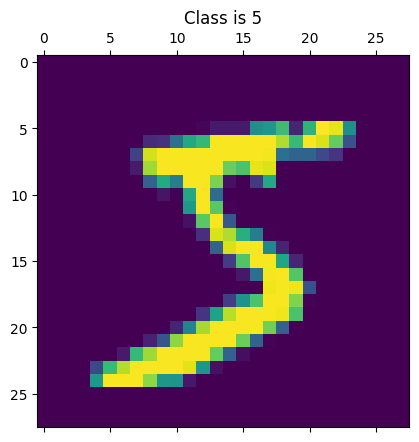

In [14]:
# Visualisation
import matplotlib.pyplot as plt
plt.matshow(X_train[0])
plt.title(f'Class is {y_train[0]}')
plt.show()

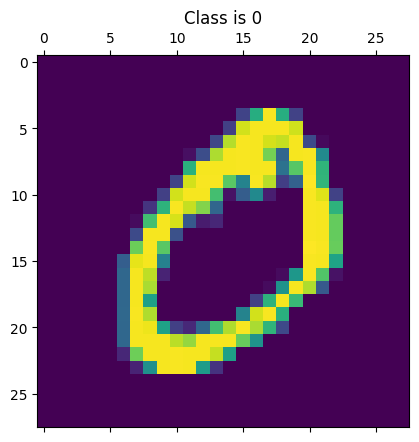

In [15]:
# Visualisation
import matplotlib.pyplot as plt
plt.matshow(X_train[1])
plt.title(f'Class is {y_train[1]}')
plt.show()

In [16]:
# Preprocessing

import numpy as np
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
np.max(X_train),np.min(X_train)

(np.float64(1.0), np.float64(0.0))

In [19]:
np.max(X_test),np.min(X_test)

(np.float64(1.0), np.float64(0.0))

In [20]:
# Flattening

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)


In [21]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
# Target
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [23]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
# Model
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=[784,],name='h1'))
model.add(Dense(128,activation='relu',name='h2'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.layers[0].get_weights()

[array([[-0.0282595 , -0.01136816, -0.06234362, ...,  0.00420872,
          0.02322424,  0.07052577],
        [ 0.02767186,  0.02410994, -0.02752594, ...,  0.03953363,
         -0.01659633, -0.01903408],
        [ 0.00330602, -0.04774644, -0.05336706, ..., -0.03465132,
         -0.02441653,  0.03718589],
        ...,
        [ 0.04255189,  0.00984553, -0.05847682, ...,  0.0404587 ,
         -0.03981173, -0.02616331],
        [ 0.05988203,  0.06618254, -0.02427466, ..., -0.07544957,
         -0.07152285,  0.05112319],
        [ 0.04899378,  0.00911021,  0.06246126, ...,  0.03630359,
          0.04519154, -0.06214933]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
history = model.fit(x = X_train,y = y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_data = (X_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8948 - loss: 0.3512 - val_accuracy: 0.9657 - val_loss: 0.1161
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9711 - loss: 0.0945 - val_accuracy: 0.9731 - val_loss: 0.0949
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9763 - val_loss: 0.0870
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9864 - loss: 0.0472 - val_accuracy: 0.9788 - val_loss: 0.0796
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9895 - loss: 0.0366 - val_accuracy: 0.9755 - val_loss: 0.1034
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss: 0.0312 - val_accuracy: 0.9759 - val_loss: 0.1033
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9923 - loss: 0.0264 - val_accuracy: 0.9805 - val_loss: 0.1008
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0

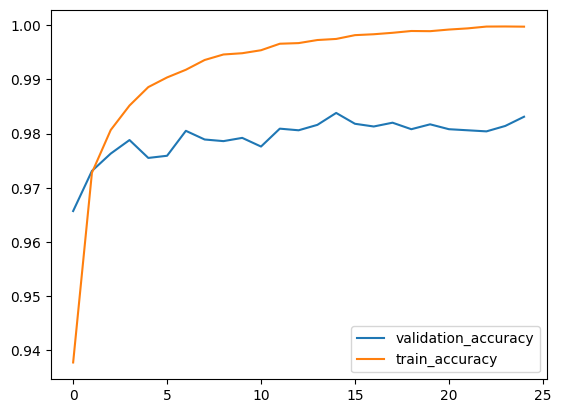

In [28]:
h = history.history

plt.plot(h['val_accuracy'],label = 'validation_accuracy')
plt.plot(h['accuracy'],label = 'train_accuracy')
plt.legend()
plt.show()

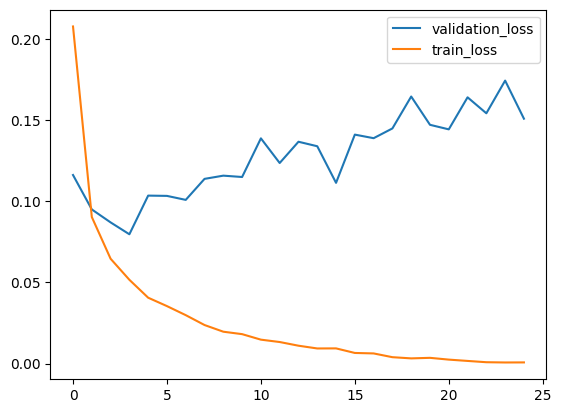

In [31]:
plt.plot(h['val_loss'],label = 'validation_loss')
plt.plot(h['loss'],label = 'train_loss')
plt.legend()
plt.show()

In [32]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9800 - loss: 0.1888


[0.15080943703651428, 0.9830999970436096]